<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/star_solarflare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solar Flares**

A major X7.1 solar flare (R3 radio blackout) peaked on 1 October at 22:20 UTC. The eruption took place around complex Beta-Gamma-Delta sunspot [News](https://www.spaceweatherlive.com/en/news.html). Also: [top-50-sonneneruptionen](https://www.spaceweatherlive.com/de/sonnenaktivitat/top-50-sonneneruptionen/jahr/2024.html)

In [ ]:
!pip install sunpy[all] drms beautifulsoup4 astropy -q
import sunpy.map
import sunpy.data.sample
from astropy import units as u
from sunpy import *
from sunpy.net import Fido, attrs as a
from astropy.time import Time
import datetime
from sunpy.timeseries import TimeSeries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

**GOES Satellite Data**

Measurements from [GOES X-ray flux](https://www.swpc.noaa.gov/products/goes-x-ray-flux). High temporal resolution, Access through SunPy's Fido interface, Most similar to LIGO data in terms of time series format

In [ ]:
def get_goes_xray_data(start_time, end_time):
        """
        Fetch GOES X-ray flux data
        Args:
            start_time (str): Start time in format 'YYYY-MM-DD HH:MM:SS'
            end_time (str): End time in format 'YYYY-MM-DD HH:MM:SS'
        Returns:
            sunpy.timeseries.TimeSeriesMetaData: GOES X-ray data
        """
        try:
            # Convert string times to datetime objects
            start = Time(start_time).datetime
            end = Time(end_time).datetime

            # Search for GOES XRS data
            result = Fido.search(a.Time(start, end),
                               a.Instrument('XRS'),
                               a.goes.SatelliteNumber(16))

            # Download the data
            downloaded_files = Fido.fetch(result)

            # Create TimeSeries from downloaded data
            goes_ts = TimeSeries(downloaded_files)

            return goes_ts

        except Exception as e:
            print(f"Error fetching GOES data: {str(e)}")
            return None

In [ ]:
# Load data for a given time period
start_time = '2024-09-01 00:00:00'
end_time = '2024-10-02 00:00:00'
goes_data = get_goes_xray_data(start_time, end_time)

Files Downloaded:   0%|          | 0/64 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20240903_v2-2-0.nc:   0%|          | 0.00/5.14M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240901_v2-2-0.nc:   0%|          | 0.00/5.20M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240902_v2-2-0.nc:   0%|          | 0.00/5.18M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240904_v2-2-0.nc:   0%|          | 0.00/5.15M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240905_v2-2-0.nc:   0%|          | 0.00/5.19M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240909_v2-2-0.nc:   0%|          | 0.00/5.06M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240906_v2-2-0.nc:   0%|          | 0.00/5.13M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240907_v2-2-0.nc:   0%|          | 0.00/5.10M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240908_v2-2-0.nc:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240910_v2-2-0.nc:   0%|          | 0.00/5.12M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240914_v2-2-0.nc:   0%|          | 0.00/5.19M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240915_v2-2-0.nc:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240912_v2-2-0.nc:   0%|          | 0.00/5.27M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240913_v2-2-0.nc:   0%|          | 0.00/5.16M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240911_v2-2-0.nc:   0%|          | 0.00/5.18M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240916_v2-2-0.nc:   0%|          | 0.00/5.01M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240919_v2-2-0.nc:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240918_v2-2-0.nc:   0%|          | 0.00/5.06M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240920_v2-2-0.nc:   0%|          | 0.00/5.06M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240917_v2-2-0.nc:   0%|          | 0.00/5.09M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240922_v2-2-0.nc:   0%|          | 0.00/5.09M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240925_v2-2-0.nc:   0%|          | 0.00/5.08M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240924_v2-2-0.nc:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240923_v2-2-0.nc:   0%|          | 0.00/5.08M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240921_v2-2-0.nc:   0%|          | 0.00/5.06M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240928_v2-2-0.nc:   0%|          | 0.00/5.04M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240929_v2-2-0.nc:   0%|          | 0.00/5.11M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240927_v2-2-0.nc:   0%|          | 0.00/5.11M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240930_v2-2-0.nc:   0%|          | 0.00/5.09M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20240926_v2-2-0.nc:   0%|          | 0.00/5.09M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20241001_v2-2-0.nc:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240902_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-flx1s_g16_d20241002_v2-2-0.nc:   0%|          | 0.00/5.26M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240901_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240903_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240905_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240904_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240908_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240907_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240906_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240909_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240912_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240913_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240910_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240911_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240914_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240916_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240917_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240915_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240918_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240923_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240921_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240920_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240919_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240922_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240926_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240924_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240927_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240928_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240925_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240929_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241001_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20240930_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

sci_xrsf-l2-avg1m_g16_d20241002_v2-2-0.nc:   0%|          | 0.00/3.14M [00:00<?, ?B/s]

In [ ]:
# Check the data structure
if goes_data is not None:
    print("Type of goes_data:", type(goes_data))
    if isinstance(goes_data, list):
        print("\nFirst item in goes_data:")
        print(goes_data[0])
    else:
        print("\nData structure:")
        print(goes_data)

# Check columns if it's already a DataFrame
if isinstance(goes_data, pd.DataFrame):
    print("\nColumns:", goes_data.columns.tolist())

Type of goes_data: <class 'list'>

First item in goes_data:
SunPy TimeSeries
----------------
Observatory:			GOES-16
Instrument:			<a href=https://www.swpc.noaa.gov/products/goes-x-ray-flux target="_blank">Unknown</a>
Channel(s):			xrsa<br>xrsb<br>xrsa_quality<br>xrsb_quality<br>xrsa_primary_chan<br>xrsb_primary_chan
Start Date:			2024-09-01 00:00:00
End Date:			2024-09-01 23:59:59
Center Date:			2024-09-01 11:59:59
Resolution:			1.0 s
Samples per Channel:		86400
Data Range(s):		xrsa                7.46E-06<br>xrsb                5.59E-05<br>xrsa_quality        2.56E+02<br>xrsb_quality        2.56E+02<br>xrsa_primary_chan   2.54E+02<br>xrsb_primary_chan   2.54E+02
Units:			dimensionless<br>W / m2
                                    xrsa      xrsb  xrsa_quality  \
2024-09-01 00:00:00.445961  4.454221e-07  0.000007             0   
2024-09-01 00:00:01.445963  4.367765e-07  0.000007             0   
2024-09-01 00:00:02.445968  4.454063e-07  0.000007             0   
2024-09-01 00:00:03.44

* Analysis handles SunPy TimeSeries objects
* Analyzes both GOES X-ray channels (short and long)
* Includes more sophisticated flare detection with duration calculation
* Shows flare class threshold lines in the plot
* Provides detailed statistics for both channels
* Adds flare duration to the annotations
* Creates a more comprehensive visualization with both channels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
from datetime import datetime

class SolarFlareAnalyzer:
    def __init__(self):
        self.flare_classes = {
            'B': 1e-7,
            'C': 1e-6,
            'M': 1e-5,
            'X': 1e-4
        }

    def analyze_goes_data(self, goes_data_list):
        """
        Analyze GOES X-ray flux data from SunPy TimeSeries
        Args:
            goes_data_list: List of SunPy TimeSeries objects
        Returns:
            dict: Analysis results
        """
        # Get the first TimeSeries object
        goes_ts = goes_data_list[0]

        # Convert TimeSeries data to DataFrame
        df = goes_ts.to_dataframe()

        # GOES channels:
        # xrsa: 0.05-0.4 nm (short channel)
        # xrsb: 0.1-0.8 nm (long channel)

        times = df.index
        short_flux = df['xrsa'].astype(float)  # Short channel
        long_flux = df['xrsb'].astype(float)   # Long channel

        # Calculate statistics for both channels
        stats = {
            'short_mean_flux': np.mean(short_flux),
            'short_max_flux': np.max(short_flux),
            'short_min_flux': np.min(short_flux),
            'short_std_flux': np.std(short_flux),
            'long_mean_flux': np.mean(long_flux),
            'long_max_flux': np.max(long_flux),
            'long_min_flux': np.min(long_flux),
            'long_std_flux': np.std(long_flux)
        }

        # Detect flares using long channel (more sensitive to flares)
        peaks, _ = signal.find_peaks(long_flux,
                                   height=np.mean(long_flux) + 2*np.std(long_flux),
                                   distance=60)  # At least 1 minute between peaks

        # Classify flares
        flares = []
        for peak in peaks:
            peak_flux = long_flux.iloc[peak]
            flare_class = self._classify_flare(peak_flux)

            # Find start of flare (when flux starts rising)
            start_idx = peak
            while start_idx > 0 and long_flux.iloc[start_idx-1] <= long_flux.iloc[start_idx]:
                start_idx -= 1

            # Find end of flare (when flux returns to near-background)
            end_idx = peak
            background_level = long_flux.iloc[start_idx]
            while end_idx < len(long_flux)-1 and long_flux.iloc[end_idx] > background_level * 1.1:
                end_idx += 1

            flares.append({
                'start_time': times[start_idx],
                'peak_time': times[peak],
                'end_time': times[end_idx],
                'peak_flux': peak_flux,
                'class': flare_class,
                'duration': (times[end_idx] - times[start_idx]).total_seconds()
            })

        return {
            'statistics': stats,
            'flares': flares,
            'times': times,
            'short_flux': short_flux,
            'long_flux': long_flux,
            'dataframe': df
        }

    def plot_goes_analysis(self, analysis_results):
        """Plot the analysis results"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        # Plot both channels
        ax1.semilogy(analysis_results['times'],
                    analysis_results['short_flux'],
                    label='0.05-0.4 nm (short)',
                    alpha=0.7)
        ax1.semilogy(analysis_results['times'],
                    analysis_results['long_flux'],
                    label='0.1-0.8 nm (long)',
                    alpha=0.7)

        # Add flare class threshold lines
        for class_letter, threshold in self.flare_classes.items():
            ax1.axhline(y=threshold, color='gray', linestyle='--', alpha=0.3)
            ax1.text(analysis_results['times'][0], threshold,
                    f'{class_letter} class', va='bottom')

        # Plot detected flares
        if analysis_results['flares']:
            peak_times = [f['peak_time'] for f in analysis_results['flares']]
            peak_fluxes = [f['peak_flux'] for f in analysis_results['flares']]
            ax1.scatter(peak_times, peak_fluxes, color='red', marker='*',
                       s=150, label='Detected Flares')

            # Add flare class annotations
            for flare in analysis_results['flares']:
                ax1.annotate(f"{flare['class']}\n{flare['duration']:.0f}s",
                           (flare['peak_time'], flare['peak_flux']),
                           xytext=(10, 10), textcoords='offset points',
                           bbox=dict(facecolor='white', alpha=0.7))

        ax1.set_ylabel('Flux (W/m²)')
        ax1.set_title('GOES X-ray Flux')
        ax1.grid(True)
        ax1.legend()

        # Plot flux distribution for both channels
        sns.histplot(data=np.log10(analysis_results['short_flux']),
                    label='Short Channel', alpha=0.5, ax=ax2)
        sns.histplot(data=np.log10(analysis_results['long_flux']),
                    label='Long Channel', alpha=0.5, ax=ax2)
        ax2.set_xlabel('Log Flux (W/m²)')
        ax2.set_title('Flux Distribution')
        ax2.legend()

        plt.tight_layout()
        return fig

    def _classify_flare(self, flux):
        """Classify flare based on peak flux"""
        for class_letter in ['B', 'C', 'M', 'X']:
            class_flux = self.flare_classes[class_letter]
            if flux < class_flux * 10:
                magnitude = flux / class_flux
                return f"{class_letter}{magnitude:.1f}"
        return f"X{flux / self.flare_classes['X']:.1f}"

    def get_summary(self, analysis_results):
        """Get a summary of the analysis"""
        summary = {
            'total_flares': len(analysis_results['flares']),
            'flux_statistics': analysis_results['statistics']
        }

        # Count flares by class
        class_counts = {}
        for flare in analysis_results['flares']:
            class_letter = flare['class'][0]  # Get main class letter (B, C, M, or X)
            class_counts[class_letter] = class_counts.get(class_letter, 0) + 1

        summary['flare_classes'] = class_counts

        return summary

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



Analysis Summary:
Total flares detected: 107

Flares by class:
M-class: 107

Flux Statistics:
short_mean_flux: 8.81e-07
short_max_flux: 7.46e-06
short_min_flux: -2.72e-09
short_std_flux: 1.59e-06
long_mean_flux: 1.15e-05
long_max_flux: 5.58e-05
long_min_flux: -1.68e-08
long_std_flux: 1.31e-05


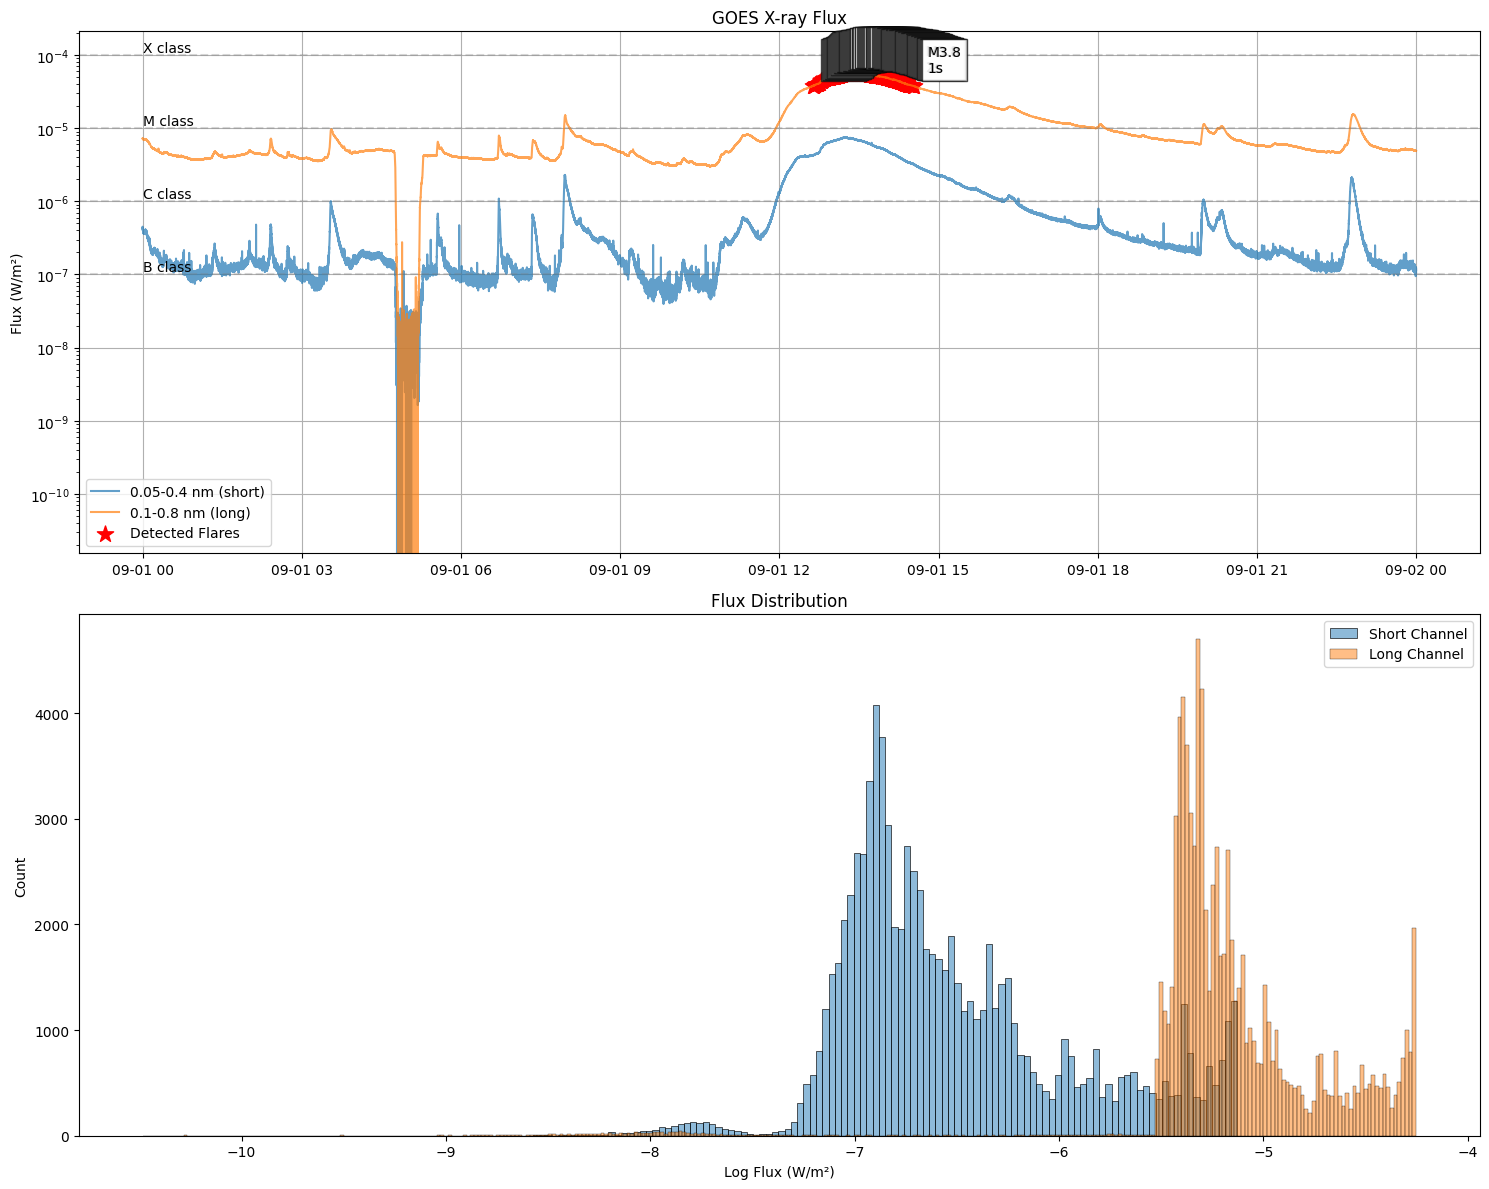

In [ ]:
# Initialize the analyzer
analyzer = SolarFlareAnalyzer()

# Analyze GOES data
if goes_data is not None:
    goes_analysis = analyzer.analyze_goes_data(goes_data)
    goes_plot = analyzer.plot_goes_analysis(goes_analysis)

    # Get and print summary
    summary = analyzer.get_summary(goes_analysis)

    print("\nAnalysis Summary:")
    print(f"Total flares detected: {summary['total_flares']}")

    print("\nFlares by class:")
    for class_letter, count in summary['flare_classes'].items():
        print(f"{class_letter}-class: {count}")

    print("\nFlux Statistics:")
    for key, value in summary['flux_statistics'].items():
        print(f"{key}: {value:.2e}")

    # Save the plot
    goes_plot.savefig('goes_analysis.png')

*Extracts more interesting features from your GOES X-ray data*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, integrate
from scipy.stats import gaussian_kde
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class AdvancedSolarAnalyzer:
    def __init__(self):
        self.flare_classes = {
            'B': 1e-7,
            'C': 1e-6,
            'M': 1e-5,
            'X': 1e-4
        }

    def analyze_background_radiation(self, goes_data_list):
        """
        Analyze background X-ray radiation levels
        """
        goes_ts = goes_data_list[0]
        df = goes_ts.to_dataframe()

        # Calculate rolling minimum as background estimate
        window_size = '1H'  # 1-hour window
        background_short = df['xrsa'].rolling(window_size).min()
        background_long = df['xrsb'].rolling(window_size).min()

        # Calculate signal-to-noise ratio
        snr_short = df['xrsa'] / background_short
        snr_long = df['xrsb'] / background_long

        return {
            'background_short': background_short,
            'background_long': background_long,
            'snr_short': snr_short,
            'snr_long': snr_long,
            'times': df.index
        }

    def analyze_flare_characteristics(self, goes_data_list):
        """
        Detailed analysis of flare characteristics
        """
        goes_ts = goes_data_list[0]
        df = goes_ts.to_dataframe()

        # Find flares
        peaks, _ = signal.find_peaks(df['xrsb'],
                                   height=np.mean(df['xrsb']) + 2*np.std(df['xrsb']),
                                   distance=60)

        flare_characteristics = []
        for peak in peaks:
            # Find start and end of flare
            start_idx = peak
            while start_idx > 0 and df['xrsb'].iloc[start_idx-1] <= df['xrsb'].iloc[start_idx]:
                start_idx -= 1

            end_idx = peak
            background_level = df['xrsb'].iloc[start_idx]
            while end_idx < len(df['xrsb'])-1 and df['xrsb'].iloc[end_idx] > background_level * 1.1:
                end_idx += 1

            # Calculate characteristics
            flare_data = {
                'start_time': df.index[start_idx],
                'peak_time': df.index[peak],
                'end_time': df.index[end_idx],
                'peak_flux': df['xrsb'].iloc[peak],
                'class': self._classify_flare(df['xrsb'].iloc[peak]),
                'duration': (df.index[end_idx] - df.index[start_idx]).total_seconds(),
                'rise_time': (df.index[peak] - df.index[start_idx]).total_seconds(),
                'decay_time': (df.index[end_idx] - df.index[peak]).total_seconds(),
                'total_energy': np.trapz(df['xrsb'].iloc[start_idx:end_idx]),
                'peak_to_background': df['xrsb'].iloc[peak] / df['xrsb'].iloc[start_idx],
                'rise_rate': (df['xrsb'].iloc[peak] - df['xrsb'].iloc[start_idx]) /
                            (peak - start_idx) if peak > start_idx else 0,
                'decay_rate': (df['xrsb'].iloc[end_idx] - df['xrsb'].iloc[peak]) /
                             (end_idx - peak) if end_idx > peak else 0
            }
            flare_characteristics.append(flare_data)

        return pd.DataFrame(flare_characteristics)

    def analyze_temporal_patterns(self, goes_data_list):
        """
        Analyze temporal patterns in solar activity
        """
        goes_ts = goes_data_list[0]
        df = goes_ts.to_dataframe()

        # Resample data to different time scales
        hourly = df['xrsb'].resample('1H').mean()
        daily = df['xrsb'].resample('1D').mean()

        # Calculate variability metrics
        hourly_std = df['xrsb'].resample('1H').std()
        hourly_range = df['xrsb'].resample('1H').max() - df['xrsb'].resample('1H').min()

        return {
            'hourly_means': hourly,
            'daily_means': daily,
            'hourly_std': hourly_std,
            'hourly_range': hourly_range
        }

    def analyze_dual_channel_correlation(self, goes_data_list):
        """
        Analyze correlation between short and long wavelength channels
        """
        goes_ts = goes_data_list[0]
        df = goes_ts.to_dataframe()

        # Calculate correlation
        correlation = df['xrsa'].corr(df['xrsb'])

        # Calculate ratio between channels
        channel_ratio = df['xrsb'] / df['xrsa']

        return {
            'correlation': correlation,
            'channel_ratio': channel_ratio,
            'times': df.index
        }

    def plot_advanced_analysis(self, background_results, flare_chars, temporal_results, correlation_results):
        """
        Create comprehensive visualizations of the advanced analysis
        """
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(3, 2)

        # Background radiation plot
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.semilogy(background_results['times'], background_results['background_long'],
                    label='Background (Long)', alpha=0.7)
        ax1.set_title('Background Radiation Levels')
        ax1.set_ylabel('Flux (W/m²)')
        ax1.grid(True)
        ax1.legend()

        # Flare characteristics
        ax2 = fig.add_subplot(gs[0, 1])
        if len(flare_chars) > 0:
            sns.scatterplot(data=flare_chars, x='duration', y='total_energy',
                          hue='class', size='peak_flux', ax=ax2)
            ax2.set_title('Flare Characteristics')
            ax2.set_xlabel('Duration (s)')
            ax2.set_ylabel('Total Energy')

        # Temporal patterns
        ax3 = fig.add_subplot(gs[1, 0])
        temporal_results['hourly_means'].plot(ax=ax3)
        ax3.set_title('Hourly Average Flux')
        ax3.set_ylabel('Flux (W/m²)')
        ax3.grid(True)

        # Channel correlation
        ax4 = fig.add_subplot(gs[1, 1])
        sns.histplot(data=np.log10(correlation_results['channel_ratio']),
                    kde=True, ax=ax4)
        ax4.set_title(f'Channel Ratio Distribution\nCorrelation: {correlation_results["correlation"]:.3f}')
        ax4.set_xlabel('Log10(Long/Short Channel Ratio)')

        # Signal-to-Noise Ratio
        ax5 = fig.add_subplot(gs[2, 0])
        ax5.plot(background_results['times'], background_results['snr_long'],
                label='Long Channel SNR', alpha=0.7)
        ax5.set_title('Signal-to-Noise Ratio')
        ax5.set_ylabel('SNR')
        ax5.grid(True)
        ax5.legend()

        # Flare timing distribution
        ax6 = fig.add_subplot(gs[2, 1])
        if len(flare_chars) > 0:
            flare_hours = pd.to_datetime(flare_chars['peak_time']).dt.hour
            sns.histplot(data=flare_hours, bins=24, ax=ax6)
            ax6.set_title('Flare Timing Distribution')
            ax6.set_xlabel('Hour of Day')

        plt.tight_layout()
        return fig

    def _classify_flare(self, flux):
        """Helper function to classify flares"""
        for class_letter in ['B', 'C', 'M', 'X']:
            class_flux = self.flare_classes[class_letter]
            if flux < class_flux * 10:
                magnitude = flux / class_flux
                return f"{class_letter}{magnitude:.1f}"
        return f"X{flux / self.flare_classes['X']:.1f}"

    def get_comprehensive_summary(self, flare_chars, correlation_results):
        """Generate a comprehensive summary of the analysis"""
        summary = {
            'total_flares': len(flare_chars),
            'flare_classes': flare_chars['class'].str[0].value_counts().to_dict(),
            'avg_duration': flare_chars['duration'].mean(),
            'avg_energy': flare_chars['total_energy'].mean(),
            'channel_correlation': correlation_results['correlation'],
            'strongest_flare': flare_chars.loc[flare_chars['peak_flux'].idxmax(), 'class']
            if len(flare_chars) > 0 else None
        }
        return summary

<ipython-input-19-08659efccfda>:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  background_short = df['xrsa'].rolling(window_size).min()
<ipython-input-19-08659efccfda>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  background_long = df['xrsb'].rolling(window_size).min()
<ipython-input-19-08659efccfda>:97: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df['xrsb'].resample('1H').mean()
<ipython-input-19-08659efccfda>:101: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_std = df['xrsb'].resample('1H').std()
<ipython-input-19-08659efccfda>:102: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_range = df['xrsb'].resample('1H').max() - df['xrsb'].resample('1H').min()
/usr/local/lib/python3.10/dist-packag


Comprehensive Analysis Summary:
Total flares detected: 107

Flares by class:
M-class: 107

Average flare duration: 1.8 seconds
Channel correlation: 0.972
Strongest flare: M5.6


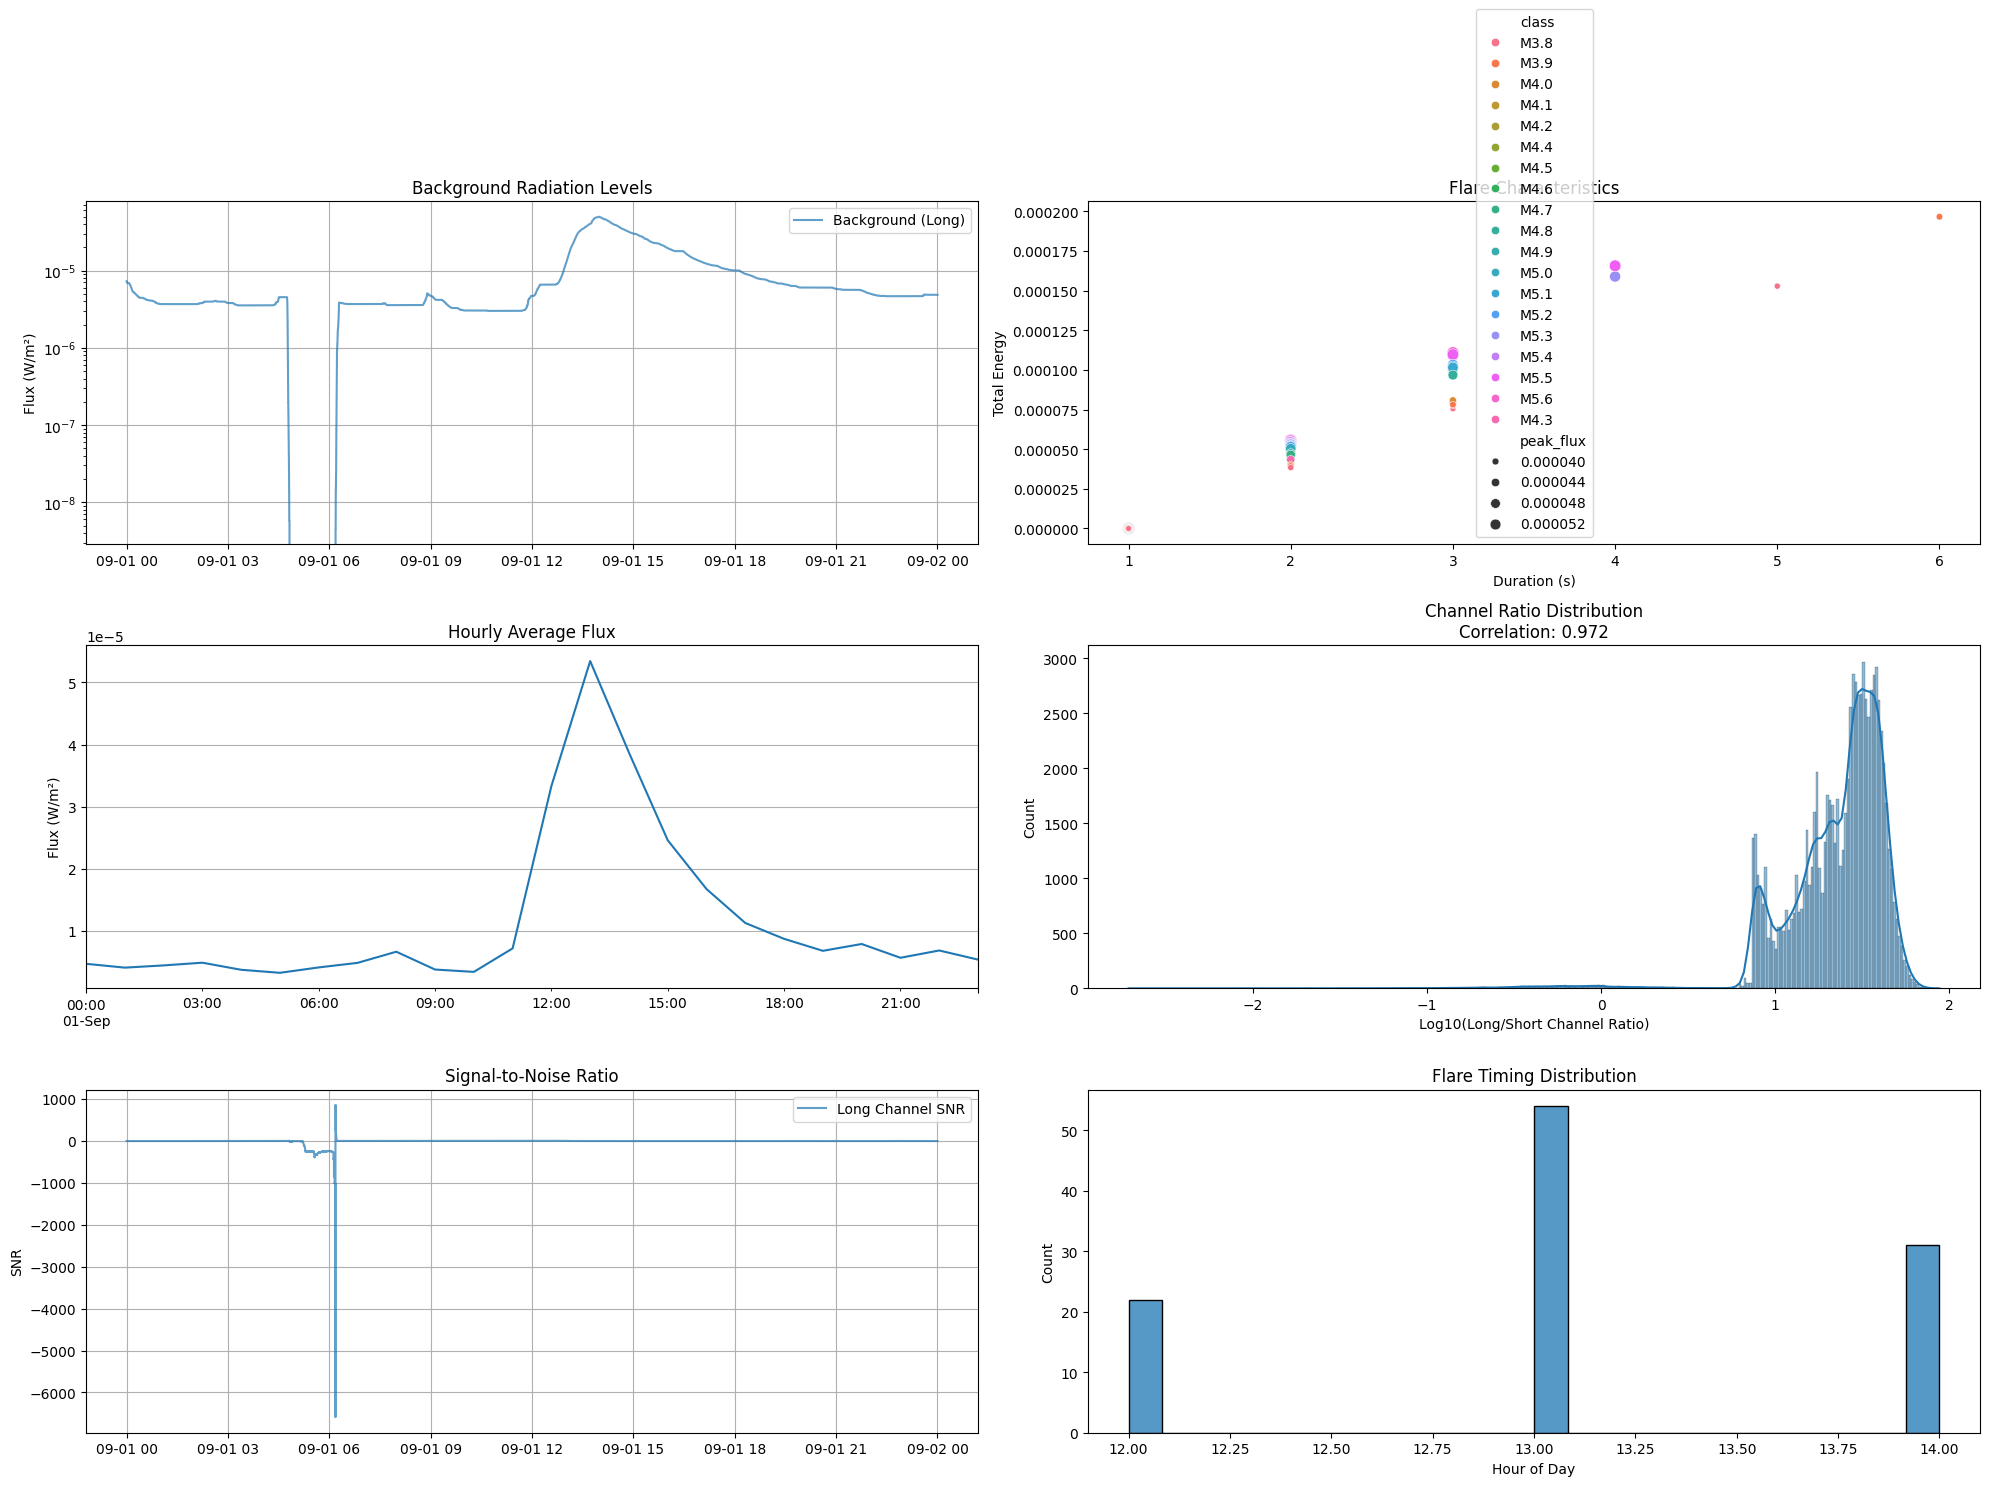

In [ ]:
# Initialize the advanced analyzer
advanced_analyzer = AdvancedSolarAnalyzer()

if goes_data is not None:
    # Perform various analyses
    background = advanced_analyzer.analyze_background_radiation(goes_data)
    flare_characteristics = advanced_analyzer.analyze_flare_characteristics(goes_data)
    temporal_patterns = advanced_analyzer.analyze_temporal_patterns(goes_data)
    channel_correlation = advanced_analyzer.analyze_dual_channel_correlation(goes_data)

    # Create visualization
    advanced_plot = advanced_analyzer.plot_advanced_analysis(
        background, flare_characteristics, temporal_patterns, channel_correlation
    )

    # Get comprehensive summary
    summary = advanced_analyzer.get_comprehensive_summary(
        flare_characteristics, channel_correlation
    )

    print("\nComprehensive Analysis Summary:")
    print(f"Total flares detected: {summary['total_flares']}")
    print("\nFlares by class:")
    for class_letter, count in summary['flare_classes'].items():
        print(f"{class_letter}-class: {count}")
    print(f"\nAverage flare duration: {summary['avg_duration']:.1f} seconds")
    print(f"Channel correlation: {summary['channel_correlation']:.3f}")
    print(f"Strongest flare: {summary['strongest_flare']}")

    # Save the plot
    advanced_plot.savefig('advanced_solar_analysis.png')

1. **Background Radiation Analysis**:
   - Background level estimation
   - Signal-to-noise ratio calculation
   - Temporal variations in background

2. **Detailed Flare Characteristics**:
   - Rise and decay times
   - Energy calculations
   - Peak-to-background ratios
   - Rise and decay rates

3. **Temporal Pattern Analysis**:
   - Hourly and daily patterns
   - Variability metrics
   - Time-of-day distribution of flares

4. **Dual Channel Analysis**:
   - Channel correlation
   - Channel ratio distribution
   - Comparative behavior

5. **Comprehensive Visualization**:
   - Multi-panel plots showing different aspects
   - Distribution analyses
   - Temporal patterns
   - Correlation analyses


**Call several databases at once**

**Solar Flare Data Sources**

* GOES Satellite Data: X-ray flux measurements, High temporal resolution, Access through SunPy's Fido interface, Most similar to LIGO data in terms of time series format

* SDO/AIA (Solar Dynamics Observatory): High-resolution solar images, Multiple wavelengths available, Similar to Kepler/TESS in terms of image data handling

* NOAA SWPC Data: Cataloged flare events, Classifications and properties, Historical archive

* HEK (Heliophysics Event Knowledgebase): Comprehensive database of solar events, Multiple event types, Cross-referenced with various instruments

In [ ]:
# Automate fetching several databases at once
class SolarDataFetcher:
    """Class to fetch solar flare data from various sources"""

    def get_goes_xray_data(self, start_time, end_time):
        """
        Fetch GOES X-ray flux data
        Args:
            start_time (str): Start time in format 'YYYY-MM-DD HH:MM:SS'
            end_time (str): End time in format 'YYYY-MM-DD HH:MM:SS'
        Returns:
            sunpy.timeseries.TimeSeriesMetaData: GOES X-ray data
        """
        try:
            # Convert string times to datetime objects
            start = Time(start_time).datetime
            end = Time(end_time).datetime

            # Search for GOES XRS data
            result = Fido.search(a.Time(start, end),
                               a.Instrument('XRS'),
                               a.goes.SatelliteNumber(16))

            # Download the data
            downloaded_files = Fido.fetch(result)

            # Create TimeSeries from downloaded data
            goes_ts = TimeSeries(downloaded_files)

            return goes_ts

        except Exception as e:
            print(f"Error fetching GOES data: {str(e)}")
            return None

    def get_sdo_aia_data(self, start_time, wavelength=171):
        """
        Fetch SDO/AIA image data
        Args:
            start_time (str): Time in format 'YYYY-MM-DD HH:MM:SS'
            wavelength (int): Wavelength in Angstroms (171, 193, 211, 304, etc.)
        Returns:
            sunpy.map.Map: SDO image data
        """
        try:
            # Convert string time to datetime
            search_time = Time(start_time).datetime

            # Search for AIA data
            result = Fido.search(a.Time(search_time, search_time + datetime.timedelta(minutes=1)),
                               a.Instrument('AIA'),
                               a.Wavelength(wavelength * u.angstrom))

            # Download the data
            downloaded_files = Fido.fetch(result)

            # Create Map from downloaded data
            aia_map = sunpy.map.Map(downloaded_files[0])

            return aia_map

        except Exception as e:
            print(f"Error fetching SDO/AIA data: {str(e)}")
            return None

    def get_noaa_flare_events(self, start_date, end_date):
        """
        Fetch NOAA solar flare event list
        Args:
            start_date (str): Start date in format 'YYYY-MM-DD'
            end_date (str): End date in format 'YYYY-MM-DD'
        Returns:
            pandas.DataFrame: Flare events data
        """
        try:
            # Format the dates for the NOAA URL
            start = datetime.datetime.strptime(start_date, '%Y-%m-%d')
            end = datetime.datetime.strptime(end_date, '%Y-%m-%d')

            base_url = "https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-features/solar-flares/x-rays/goes/xrs/"

            events = []
            current_date = start

            while current_date <= end:
                year = current_date.year
                month = str(current_date.month).zfill(2)

                # Construct URL for monthly data
                url = f"{base_url}/{year}/goes-xrs-report_{year}{month}.txt"

                try:
                    # Read data from URL
                    data = pd.read_csv(url, delimiter=r"\s+", skiprows=2)
                    events.append(data)
                except:
                    print(f"No data available for {year}-{month}")

                # Move to next month
                if current_date.month == 12:
                    current_date = datetime.datetime(current_date.year + 1, 1, 1)
                else:
                    current_date = datetime.datetime(current_date.year,
                                                   current_date.month + 1, 1)

            if events:
                return pd.concat(events, ignore_index=True)
            else:
                return None

        except Exception as e:
            print(f"Error fetching NOAA event data: {str(e)}")
            return None

    def get_hek_flare_data(self, start_time, end_time):
        """
        Fetch flare data from the Heliophysics Event Knowledgebase (HEK)
        Args:
            start_time (str): Start time in format 'YYYY-MM-DD HH:MM:SS'
            end_time (str): End time in format 'YYYY-MM-DD HH:MM:SS'
        Returns:
            list: HEK flare events
        """
        try:
            # Convert string times to datetime objects
            start = Time(start_time).datetime
            end = Time(end_time).datetime

            # Search for flare events in HEK
            result = Fido.search(a.Time(start, end),
                               a.hek.EventType('FL'),  # FL for flare
                               a.hek.FL.GOESCls > 'B1.0')  # Only get flares above B1.0

            return result

        except Exception as e:
            print(f"Error fetching HEK data: {str(e)}")
            return None

In [ ]:
# Initialize the fetcher
fetcher = SolarDataFetcher()

# Example: Get GOES X-ray data for a specific time range
goes_data = fetcher.get_goes_xray_data('2024-09-01 00:00:00', '2024-10-02 00:00:00')

# Example: Get SDO/AIA image data
sdo_image = fetcher.get_sdo_aia_data('2024-09-01 12:00:00', wavelength=171)

# Example: Get NOAA flare events
flare_events = fetcher.get_noaa_flare_events('2024-09-01', '2024-10-31')

# Example: Get HEK flare data
hek_events = fetcher.get_hek_flare_data('2024-09-01 00:00:00', '2024-10-02 00:00:00')